In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
#with ZipFile('/content/drive/MyDrive/sertificat/aviakompaniya.zip','r') as zipObj:
#  zipObj.extractall("/content/drive/MyDrive/sertificat/22")

In [111]:
df=pd.read_csv("/content/drive/MyDrive/sertificat/22/train_dataset.csv",index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [126]:
#df.info()

In [ ]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [ ]:
df['Arrival Delay in Minutes'].isna().sum()

28

In [5]:
#df[df['Arrival Delay in Minutes'].isna()]

In [ ]:
df['satisfaction'].value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [4]:
df.shape

(10000, 24)

In [6]:
df['satisfaction'].value_counts()/len(df)*100

satisfaction
0    50.0
1    50.0
Name: count, dtype: float64

In [7]:
satif_rate = df['satisfaction'].value_counts()/len(df)*100

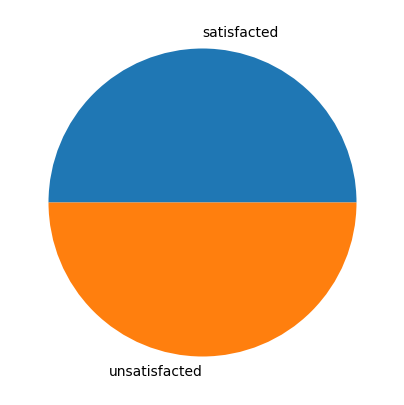

In [8]:
plt.figure(figsize=(5,5))
plt.pie(satif_rate, labels=['satisfacted', 'unsatisfacted'])
plt.show()

Text(0.5, 1.0, 'On-board service')

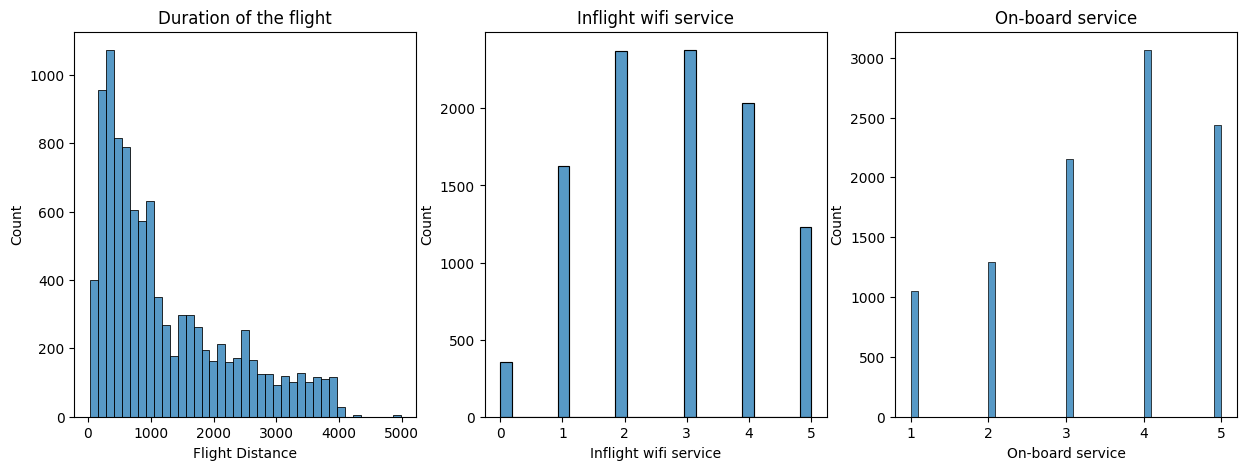

In [127]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

#Flight Distance
sns.histplot(x="Flight Distance", data=df, ax=axes[0])
axes[0].set_title("Duration of the flight")


#Inflight wifi service
sns.histplot(x='Inflight wifi service', data=df, ax=axes[1])
axes[1].set_title("Inflight wifi service")

#On-board service
sns.histplot(x="On-board service", data=df, ax=axes[2])
axes[2].set_title("On-board service")


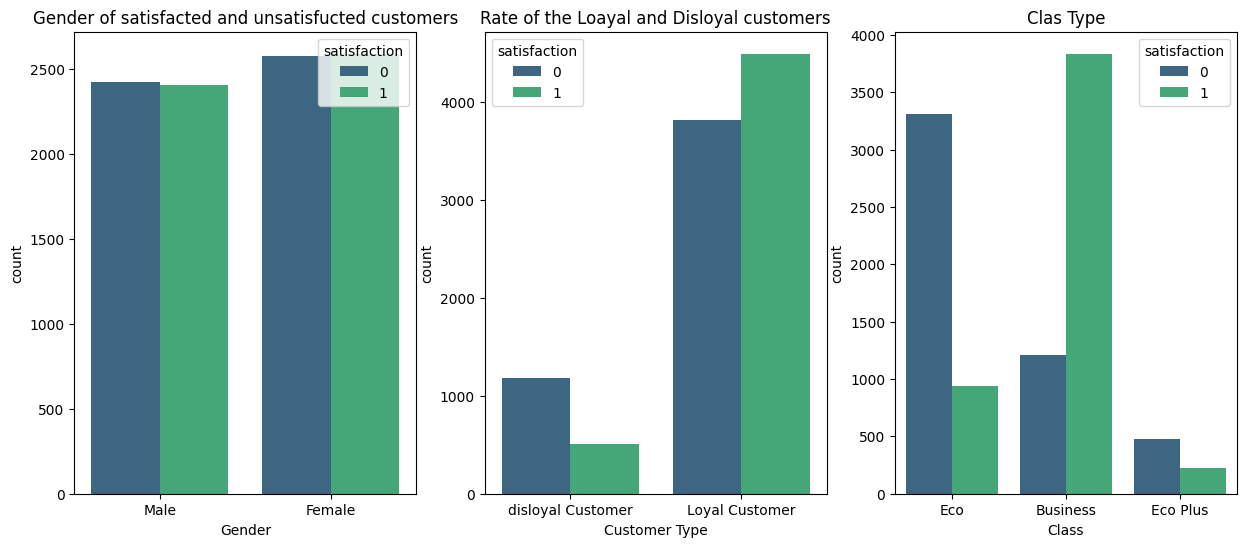

In [113]:
fig, axes = plt.subplots(1,3, figsize=(15,6))

sns.countplot(x="Gender", hue='satisfaction', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Gender of satisfacted and unsatisfucted customers")

sns.countplot(x="Customer Type", hue='satisfaction', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Rate of the Loayal and Disloyal customers")

sns.countplot(x="Class", hue="satisfaction", palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Clas Type")

plt.show()

In [65]:
#df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

In [35]:
df_num=df[['Age','Flight Distance','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']].copy()

In [38]:
df_num.corrwith(df_num['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Inflight entertainment               0.400900
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
dtype: float64

In [114]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")

#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%" )

Mavjud bo'lmagan qiymatlar soni: 28
Mavjud bo'lmagan qatorlar soni: 28
Mavjud bo'lmagan qatorlar %: 0.0%


In [80]:
#df.drop(['Gender','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)
#df.drop(['Gender','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)


In [115]:
#df=df.drop(['Gender','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'],axis=1,inplace=True)
data=df.dropna()
data.isnull().sum().sum()

0

In [116]:
encoded = pd.get_dummies(data, dtype='int')
encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
id,,,,,,,,,,,,,,,,,,,,,
1,33,571,2,3,2,4,4,2,4,4,...,0,0,1,0,1,1,0,0,1,0
2,49,1431,4,1,4,4,3,5,4,5,...,1,1,0,1,0,1,0,1,0,0
3,43,867,1,4,4,4,4,4,3,1,...,0,1,0,1,0,1,0,0,1,0
4,27,1550,3,3,3,3,2,2,2,2,...,1,1,0,1,0,1,0,1,0,0
5,11,526,3,4,3,2,4,3,4,4,...,0,0,1,1,0,0,1,0,1,0


In [117]:
encoded.corrwith(encoded['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Class_Business                       0.524897
Online boarding                      0.504671
Type of Travel_Business travel       0.481773
Type of Travel_Personal Travel       0.481773
Class_Eco                            0.478338
Inflight entertainment               0.401109
Seat comfort                         0.342061
On-board service                     0.327361
Leg room service                     0.325405
Cleanliness                          0.310046
Flight Distance                      0.298484
Inflight wifi service                0.277497
Baggage handling                     0.248839
Inflight service                     0.240580
Checkin service                      0.232337
Food and drink                       0.206881
Customer Type_Loyal Customer         0.181535
Customer Type_disloyal Customer      0.181535
Ease of Online booking               0.164025
Age                                  0.145327
Class_Eco Plus                    

In [118]:
X = encoded.drop("satisfaction", axis=1)
y = encoded['satisfaction']

In [119]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state =0)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       998
           1       0.89      0.87      0.88       997

    accuracy                           0.88      1995
   macro avg       0.88      0.88      0.88      1995
weighted avg       0.88      0.88      0.88      1995

Model aniqligi: 0.8832080200501253


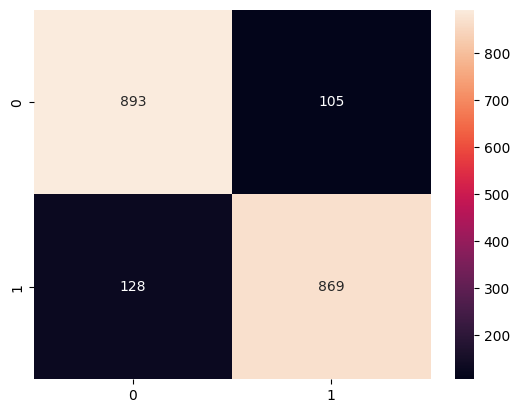

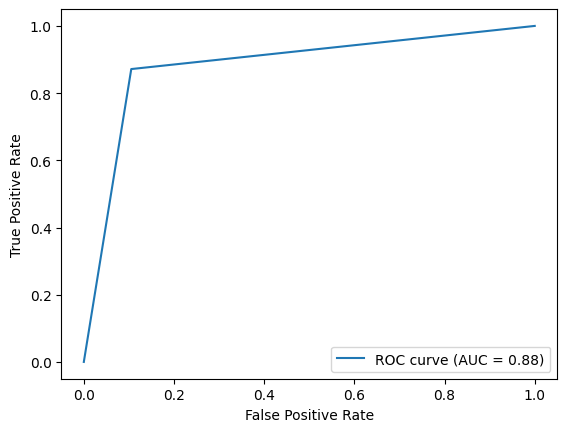

In [121]:
#Creating the model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

#Evaluating the Model
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

##ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

###Support Vector Machine

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       998
           1       0.96      0.92      0.94       997

    accuracy                           0.94      1995
   macro avg       0.94      0.94      0.94      1995
weighted avg       0.94      0.94      0.94      1995

Model aniqligi: 0.9408521303258145


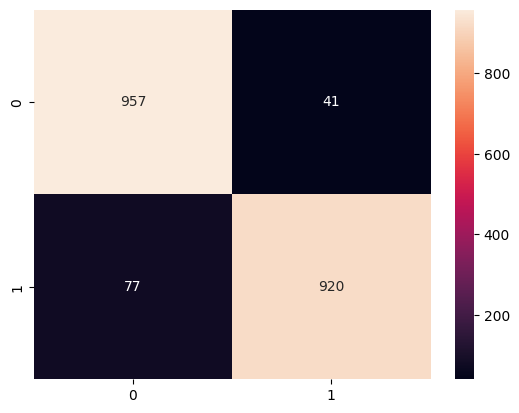

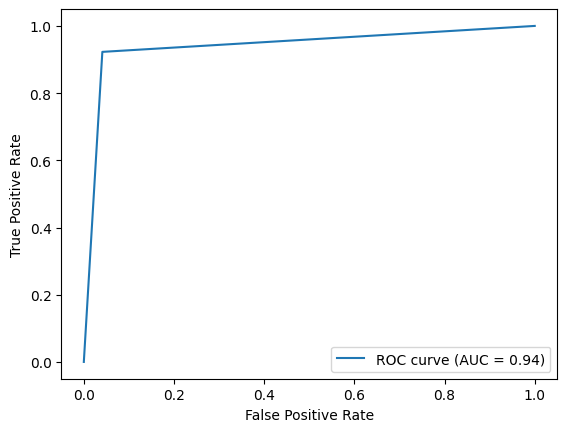

In [122]:
#Model yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

#Model baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_pred))

#confusion matrix
conf_mat = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

###Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       998
           1       0.92      0.92      0.92       997

    accuracy                           0.92      1995
   macro avg       0.92      0.92      0.92      1995
weighted avg       0.92      0.92      0.92      1995

Model aniqligi: 0.9172932330827067


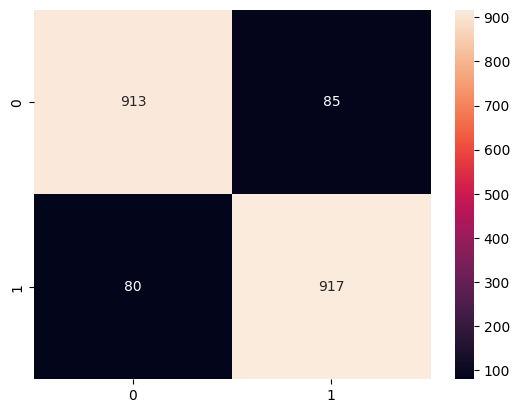

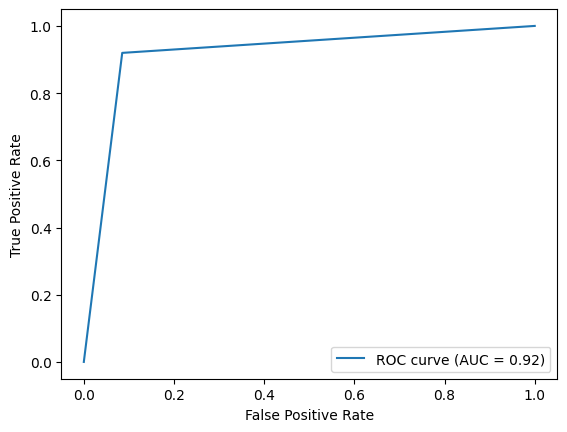

In [123]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

conf_mat = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

###Random Forest

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       998
           1       0.96      0.94      0.95       997

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995

Model aniqligi: 0.9528822055137844


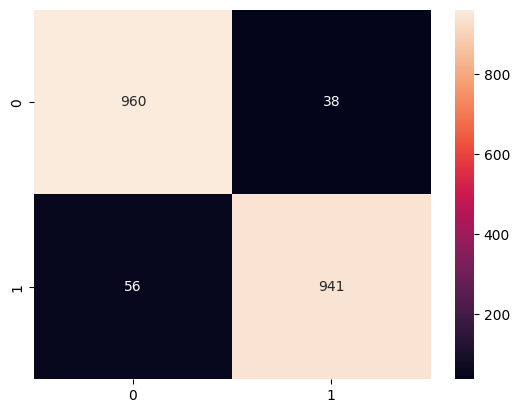

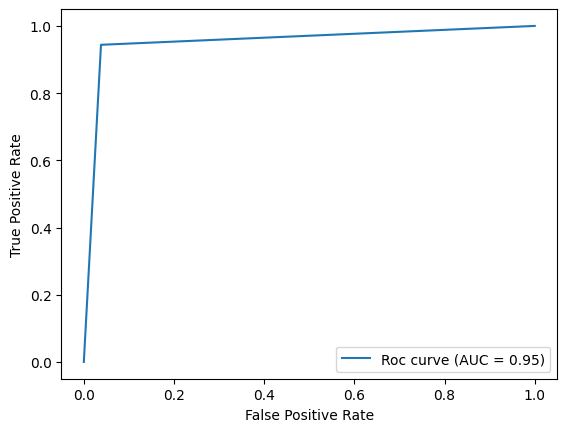

In [124]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

##ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roc curve")
display.plot()
plt.show()

###XGBoost

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       998
           1       0.96      0.94      0.95       997

    accuracy                           0.95      1995
   macro avg       0.95      0.95      0.95      1995
weighted avg       0.95      0.95      0.95      1995

Model aniqligi: 0.9528822055137844


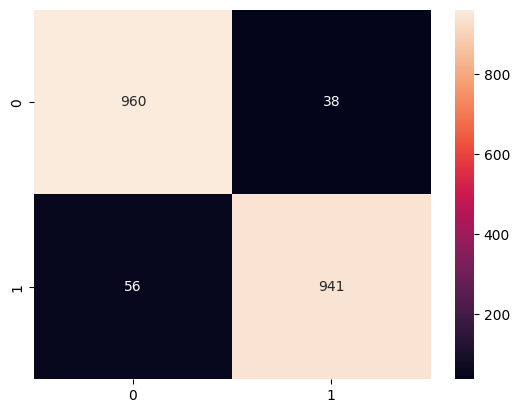

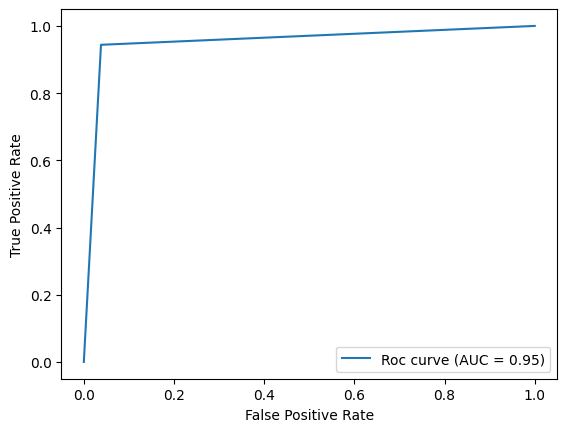

In [125]:
xgb_model = XGBClassifier(n_estimators=9)
xgb_model.fit(X_train, y_train)

y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

##ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Roc curve")
display.plot()
plt.show()